In [1]:
import pandas as pd
import seaborn as sns

In [3]:
housing_raw = pd.read_csv('../data/housing_data.csv',
                          parse_dates=['period_begin', 'period_end'],
                          dtype = {'total_homes_sold':"Int32", 'region_name':'category'})

In [4]:
ca_housing = (housing_raw
              .loc[(housing_raw['region_name'].str.contains('CA'))]
              .assign(region_name = housing_raw['region_name'].str[0:-11]))

In [5]:
ca_housing_pivot = ca_housing.pivot_table(index='period_begin',
                                          columns='region_name',
                                          values='median_active_list_price').assign(
                                            CA_average = lambda x: x.mean(axis = 1)
                                          )

In [8]:
ca_housing_markets = ca_housing_pivot.loc[:, ['San Francisco',
                                              'Los Angeles',
                                              'San Diego',
                                              'CA_average']]
ca_housing_markets       

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547
...,...,...,...,...
2022-03-28,1289875.0,906783.0,901649.6,686582.361818
2022-04-04,1289916.6,906783.1,902899.8,687180.140000
2022-04-11,1290250.0,906782.4,902899.8,687730.720000


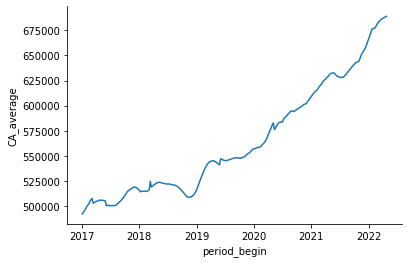

In [10]:
sns.lineplot(
    data=ca_housing_markets,
    x = ca_housing_markets.index,
    y = 'CA_average'
)

sns.despine()